### Configurações do modelo:

* **Tipo de modelo:** Random Forest Classifier
* **Número de árvores (estimadores):** 500
* **Profundidade máxima das árvores (`max_depth`):** 20
* **Número máximo de features consideradas em cada divisão (`max_features`):** raiz quadrada do total de features (`sqrt`)
* **Semente utilizada para reprodutibilidade:** 1116878836

### Pré-processamento dos dados:

* **Base utilizada:** NSL-KDD
* **Número de atributos (features):** 41
* **Codificação de variáveis categóricas:** Label Encoding aplicado às colunas `protocol_type`, `service` e `flag`.

### Padronização:

* As **features numéricas** foram padronizadas com **StandardScaler**, resultando em **média 0** e **desvio padrão 1**.
* As **colunas categóricas codificadas** foram mantidas como **inteiros**.

### Separação de dados:

* **80%** para treinamento
* **20%** para teste

### Referência de código:

* Baseado no código disponibilizado em: [GitHub - thinline72/nsl-kdd](https://github.com/thinline72/nsl-kdd)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
columns = np.array(
    [
    "duration",  # Duração da conexão em segundos
    "protocol_type",  # Tipo de protocolo utilizado (tcp, udp, icmp)
    "service",  # Serviço de destino (ex: http, ftp, telnet)
    "flag",  # Estado da conexão TCP (ex: SF - conexão finalizada sem erro)
    "src_bytes",  # Bytes enviados da origem para o destino
    "dst_bytes",  # Bytes recebidos pelo destino
    "land",  # 1 se origem e destino são iguais (ataque land), 0 caso contrário
    "wrong_fragment",  # Número de fragmentos incorretos
    "urgent",  # Número de pacotes urgentes
    "hot",  # Número de acessos a diretórios sensíveis do sistema
    "num_failed_logins",  # Número de tentativas de login falhas
    "logged_in",  # 1 se o login foi bem-sucedido, 0 caso contrário
    "num_compromised",  # Número de condições que comprometem a segurança do sistema
    "root_shell",  # 1 se um shell root foi obtido, 0 caso contrário
    "su_attempted",  # 1 se houve tentativa de usar `su` para privilégio, 0 caso contrário
    "num_root",  # Número de acessos como root
    "num_file_creations",  # Número de operações de criação de arquivos
    "num_shells",  # Número de shells abertos
    "num_access_files",  # Número de acessos a arquivos críticos do sistema
    "num_outbound_cmds",  # Número de comandos outbound em conexão FTP (sempre 0 no dataset)
    "is_host_login",  # 1 se login foi feito no host, 0 caso contrário
    "is_guest_login",  # 1 se login foi feito como convidado, 0 caso contrário
    "count",  # Número de conexões para o mesmo host nas últimas 2 segundos
    "srv_count",  # Número de conexões para o mesmo serviço nas últimas 2 segundos
    "serror_rate",  # Taxa de conexões com erro de sincronização (SYN)
    "srv_serror_rate",  # Taxa de conexões com erro de sincronização no mesmo serviço
    "rerror_rate",  # Taxa de conexões rejeitadas
    "srv_rerror_rate",  # Taxa de conexões rejeitadas no mesmo serviço
    "same_srv_rate",  # Taxa de conexões para o mesmo serviço
    "diff_srv_rate",  # Taxa de conexões para serviços diferentes
    "srv_diff_host_rate",  # Taxa de conexões para diferentes hosts no mesmo serviço
    "dst_host_count",  # Número de conexões para o mesmo destino
    "dst_host_srv_count",  # Número de conexões para o mesmo serviço no destino
    "dst_host_same_srv_rate",  # Taxa de conexões para o mesmo serviço no destino
    "dst_host_diff_srv_rate",  # Taxa de conexões para serviços diferentes no destino
    "dst_host_same_src_port_rate",  # Taxa de conexões para o mesmo destino usando a mesma porta de origem
    "dst_host_srv_diff_host_rate",  # Taxa de conexões para diferentes hosts no mesmo serviço no destino
    "dst_host_serror_rate",  # Taxa de conexões com erro de sincronização no destino
    "dst_host_srv_serror_rate",  # Taxa de conexões com erro de sincronização no mesmo serviço no destino
    "dst_host_rerror_rate",  # Taxa de conexões rejeitadas no destino
    "dst_host_srv_rerror_rate",  # Taxa de conexões rejeitadas no mesmo serviço no destino
    "label",  # Tipo de ataque ou "normal" se for tráfego legítimo
    "level",  # Gravidade do ataque (normalmente não usado)
]
)

nominal_inx = [1, 2, 3]
binary_inx = [6, 11, 13, 14, 20, 21]
numeric_inx = list(set(range(41)).difference(nominal_inx).difference(binary_inx))

nominal_cols = columns[nominal_inx].tolist()
binary_cols = columns[binary_inx].tolist()
numeric_cols = columns[numeric_inx].tolist()

print(f"Nominal columns: {nominal_cols}")
print(f"Binary columns: {binary_cols}")
print(f"Numeric columns: {numeric_cols}")

Nominal columns: ['protocol_type', 'service', 'flag']
Binary columns: ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
Numeric columns: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [5]:
# Mapeamento de ataques para categorias
attack_mapping = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

In [6]:
train_df = pd.read_csv("../../data/raw/NSL-KDD/KDDTrain+.csv", names=columns, sep=",")
test_df = pd.read_csv("../../data/raw/NSL-KDD/KDDTest+.csv", names=columns, sep=",")

train_df.drop(columns=["level"], axis=1, inplace=True)
test_df.drop(columns=["level"], axis=1, inplace=True)

print(train_df["label"].unique())

train_df["attack_label2"] = train_df["label"].apply(
    lambda x: "normal" if x == "normal" else "attack"
)

train_df["attack_label5"] = train_df["label"].map(attack_mapping)

train_labels2 = train_df["attack_label2"].value_counts()
train_labels5 = train_df["attack_label5"].value_counts()

print(train_labels2)
print(train_labels5)

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']
attack_label2
normal    67343
attack    58630
Name: count, dtype: int64
attack_label5
normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64


In [7]:
print(test_df["label"].unique())

test_df["attack_label2"] = test_df["label"].apply(
    lambda x: "normal" if x == "normal" else "attack"
)
test_df["attack_label5"] = test_df["label"].map(attack_mapping)

test_labels2 = test_df["attack_label2"].value_counts()
test_labels5 = test_df["attack_label5"].value_counts()

print(test_labels2)
print(test_labels5)

['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']
attack_label2
attack    12833
normal     9711
Name: count, dtype: int64
attack_label5
normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: count, dtype: int64


In [8]:
print("Label distribution Training set:")
print(train_df["label"].value_counts())
print()
print("Label distribution Test set:")
print(test_df["label"].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

In [9]:
print("Training set:")
for col_name in train_df.columns:
    if train_df[col_name].dtypes == "object":
        unique_cat = len(train_df[col_name].unique())
        print(
            "Feature '{col_name}' has {unique_cat} categories".format(
                col_name=col_name, unique_cat=unique_cat
            )
        )

print("\nDistribution of categories in service:")
print(train_df["service"].value_counts().sort_values(ascending=False).head())

print("Test set:")
for col_name in test_df.columns:
    if test_df[col_name].dtypes == "object":
        unique_cat = len(test_df[col_name].unique())
        print(
            "Feature '{col_name}' has {unique_cat} categories".format(
                col_name=col_name, unique_cat=unique_cat
            )
        )

print("\nDistribution of categories in service:")
print(test_df["service"].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories
Feature 'attack_label2' has 2 categories
Feature 'attack_label5' has 5 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64
Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories
Feature 'attack_label2' has 2 categories
Feature 'attack_label5' has 5 categories

Distribution of categories in service:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Get the categorical values into a 2D numpy array
train_df_categorical_values = train_df[nominal_cols]
test_df_categorical_values = test_df[nominal_cols]
train_df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [11]:
# protocol type
unique_protocol = sorted(train_df.protocol_type.unique())
string1 = "Protocol_type_"
unique_protocol2 = [string1 + x for x in unique_protocol]
# service
unique_service = sorted(train_df.service.unique())
string2 = "service_"
unique_service2 = [string2 + x for x in unique_service]
# flag
unique_flag = sorted(train_df.flag.unique())
string3 = "flag_"
unique_flag2 = [string3 + x for x in unique_flag]
# put together
dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

# do same for test set
unique_service_test = sorted(test_df.service.unique())
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [12]:
train_df_categorical_values_encoded = train_df_categorical_values.apply(
    LabelEncoder().fit_transform
)

test_df_categorical_values_encoded = test_df_categorical_values.apply(
    LabelEncoder().fit_transform
)

In [13]:
enc = OneHotEncoder()

# Treinamento
df_categorical_values_encenc = enc.fit_transform(train_df_categorical_values_encoded)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(), columns=dumcols)

# Teste
testdf_categorical_values_encenc = enc.fit_transform(test_df_categorical_values_encoded)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(), columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
train_df_service = train_df["service"].tolist()
test_df_service = test_df["service"].tolist()

difference = list(set(train_df_service) - set(test_df_service))

serv_prefix = "service_"
difference = [serv_prefix + x for x in difference]
difference

['service_harvest',
 'service_urh_i',
 'service_http_8001',
 'service_aol',
 'service_http_2784',
 'service_red_i']

In [15]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

In [16]:
# Atualizar colunas categoricas

train_df_new = train_df.join(df_cat_data)
train_df_new.drop("flag", axis=1, inplace=True)
train_df_new.drop("protocol_type", axis=1, inplace=True)
train_df_new.drop("service", axis=1, inplace=True)

test_df_new = test_df.join(testdf_cat_data)
test_df_new.drop("flag", axis=1, inplace=True)
test_df_new.drop("protocol_type", axis=1, inplace=True)
test_df_new.drop("service", axis=1, inplace=True)

print(train_df_new.shape)
print(test_df_new.shape)

(125973, 125)
(22544, 125)


In [17]:
train_df_label = train_df_new["label"]
test_df_label = test_df_new["label"]

# Mapear os tipos de ataques
train_df_label_to_category_mapper = train_df_label.replace(
    {
        "normal": 0,
        "neptune": 1,
        "back": 1,
        "land": 1,
        "pod": 1,
        "smurf": 1,
        "teardrop": 1,
        "mailbomb": 1,
        "apache2": 1,
        "processtable": 1,
        "udpstorm": 1,
        "worm": 1,
        "ipsweep": 2,
        "nmap": 2,
        "portsweep": 2,
        "satan": 2,
        "mscan": 2,
        "saint": 2,
        "ftp_write": 3,
        "guess_passwd": 3,
        "imap": 3,
        "multihop": 3,
        "phf": 3,
        "spy": 3,
        "warezclient": 3,
        "warezmaster": 3,
        "sendmail": 3,
        "named": 3,
        "snmpgetattack": 3,
        "snmpguess": 3,
        "xlock": 3,
        "xsnoop": 3,
        "httptunnel": 3,
        "buffer_overflow": 4,
        "loadmodule": 4,
        "perl": 4,
        "rootkit": 4,
        "ps": 4,
        "sqlattack": 4,
        "xterm": 4,
    }
)
test_df_label_to_category_mapper = test_df_label.replace(
    {
        "normal": 0,
        "neptune": 1,
        "back": 1,
        "land": 1,
        "pod": 1,
        "smurf": 1,
        "teardrop": 1,
        "mailbomb": 1,
        "apache2": 1,
        "processtable": 1,
        "udpstorm": 1,
        "worm": 1,
        "ipsweep": 2,
        "nmap": 2,
        "portsweep": 2,
        "satan": 2,
        "mscan": 2,
        "saint": 2,
        "ftp_write": 3,
        "guess_passwd": 3,
        "imap": 3,
        "multihop": 3,
        "phf": 3,
        "spy": 3,
        "warezclient": 3,
        "warezmaster": 3,
        "sendmail": 3,
        "named": 3,
        "snmpgetattack": 3,
        "snmpguess": 3,
        "xlock": 3,
        "xsnoop": 3,
        "httptunnel": 3,
        "buffer_overflow": 4,
        "loadmodule": 4,
        "perl": 4,
        "rootkit": 4,
        "ps": 4,
        "sqlattack": 4,
        "xterm": 4,
    }
)
# put the new label column back
train_df_new["label"] = train_df_label_to_category_mapper
test_df_new["label"] = test_df_label_to_category_mapper
print(train_df_new.columns)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=125)


C:\Users\mathe\AppData\Local\Temp\ipykernel_26336\2824236955.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df_label_to_category_mapper = train_df_label.replace(
C:\Users\mathe\AppData\Local\Temp\ipykernel_26336\2824236955.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_label_to_category_mapper = test_df_label.replace(


In [18]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Separar X e y
X = train_df.drop(columns=["label", "attack_label2", "attack_label5"])
y = train_df["attack_label2"]

# Label Encoding das colunas categóricas
for col in nominal_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

for col in numeric_cols:
    X[col] = X[col].astype(float)

# Label Encoding de y
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Standardize numeric_cols
scaler = StandardScaler()

X_numeric = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Substituir as colunas numéricas padronizadas
X.update(X_numeric)

In [19]:
from sklearn.model_selection import train_test_split

seed = 1116878836

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=seed, stratify=y_encoded
)

In [20]:
# Referência de treinamento: https://github.com/thinline72/nsl-kdd/blob/master/NSL-KDD.ipynb
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    random_state=seed,
    max_features='sqrt'
)

rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Matriz de Confusão:
[[11705    21]
 [    5 13464]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



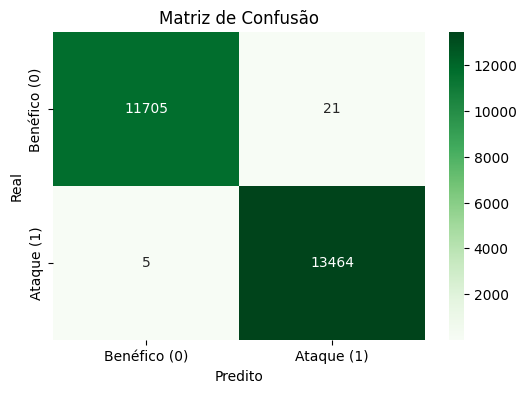

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Benéfico (0)", "Ataque (1)"],
    yticklabels=["Benéfico (0)", "Ataque (1)"],
)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y_encoded, cv=5, scoring="accuracy")
print("Cross-validation accuracies:", scores)
print("Média:", scores.mean())

Cross-validation accuracies: [0.99872991 0.99892836 0.99880929 0.99884893 0.99920616]
Média: 0.9989045291136535


In [23]:
from sklearn.metrics import accuracy_score

train_pred = rf.predict(X_train)

print("Train accuracy:", accuracy_score(y_train, train_pred))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 0.9999106947944988
Test accuracy: 0.9989680492161143


In [24]:

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [25]:
shap_values_normal = shap_values[:, :, 0]
shap_values_normal2 = shap_values2[:, :, 0]
shap_values_attack = shap_values[:, :, 1]
shap_values_attack2 = shap_values2[:, :, 1]

# Summary plot - importância global
print("SHAP Summary Plot - Random Forest")
shap.summary_plot(shap_values_attack2, X_test, plot_type="bar", feature_names=X_test.columns)
# shap.summary_plot(shap_values, X_test)
# shap.summary_plot(shap_values2, X_test)

NameError: name 'shap_values2' is not defined

In [ ]:
import joblib

joblib.dump({
    "model": "RF",
    "shap_values": shap_values_attack,
    "X_test": X_test,
    "features": X_test.columns.tolist()
}, "shap_rf.pkl")

['shap_rf.pkl']

In [ ]:
df_shap = pd.DataFrame(shap_values_attack, columns=X_test.columns)
df_shap.to_csv("shap_rf.csv", index=False)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test, columns=X_test.columns.tolist())

shap.plots.force(
    explainer.expected_value,
    shap_values[10],                  # ou shap_values[1][10] se shap_values for uma lista
    X_test_scaled_df.iloc[10],
    matplotlib=True
)

NameError: name 'X_test' is not defined

In [ ]:
# Selecionar uma instância aleatória do teste
i = 0  # ou qualquer índice

print(explainer.expected_value)
print

# shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[i, :])

print(X_train.shape)
print(X_test.shape)

i = 0  # instância
class_idx = 0  # classe de interesse

# shap.force_plot(explainer.expected_value[class_idx], shap_values[class_idx][i], X_test.iloc[i])

print(shap_values[class_idx][i].shape)
print(X_test.iloc[i].shape)

[0.46527869 0.53472131]
(100778, 42)
(25195, 42)
(2,)
(42,)


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Criar explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns.tolist(),
    class_names=le_y.classes_.tolist(),  # ['attack', 'normal']
    mode="classification",
)

In [ ]:
# Explicar a predição de uma instância
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[i], predict_fn=rf.predict_proba
)
exp.save_to_file("lime_explanation_instance_0.html")

c:\Users\mathe\Documents\Estudos\TCC-UDESC\xai-in-ids\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\mathe\Documents\Estudos\TCC-UDESC\xai-in-ids\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\mathe\Documents\Estudos\TCC-UDESC\xai-in-ids\.venv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer ke